In [47]:
#importing packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import style
import warnings 

#warnings.filter("ignore")
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,10)

In [48]:
#IMPORTING AND CLEANING DATA

# read data
df = pd.read_csv("dataset.txt")

# checking shape and data types of the data
print(df.shape, "\n")
print(df.dtypes, "\n")

# checking numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("The column with numeric values include:", numeric_cols, "\n")

# checking non-numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The columns and non-numeric values include:", non_numeric_cols, "\n")

#viewing missing data via percentage list
cols = df.columns[:]
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    
# ensuring data consistency
#df['Name'] = df['Name'].str.lower()
#df['Author'] = df['Author'].str.lower()
#df['Genre'] = df['Genre'].str.lower()

# removing duplicate data
df_dedupped = df.drop_duplicates()
print(df.shape, "\n")
print(df_dedupped.shape, "\n")


(550, 7) 

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object 

The column with numeric values include: ['User Rating' 'Reviews' 'Price' 'Year'] 

The columns and non-numeric values include: ['Name' 'Author' 'Genre'] 

Name - 0.0%
Author - 0.0%
User Rating - 0.0%
Reviews - 0.0%
Price - 0.0%
Year - 0.0%
Genre - 0.0%
(550, 7) 

(550, 7) 



In [49]:
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


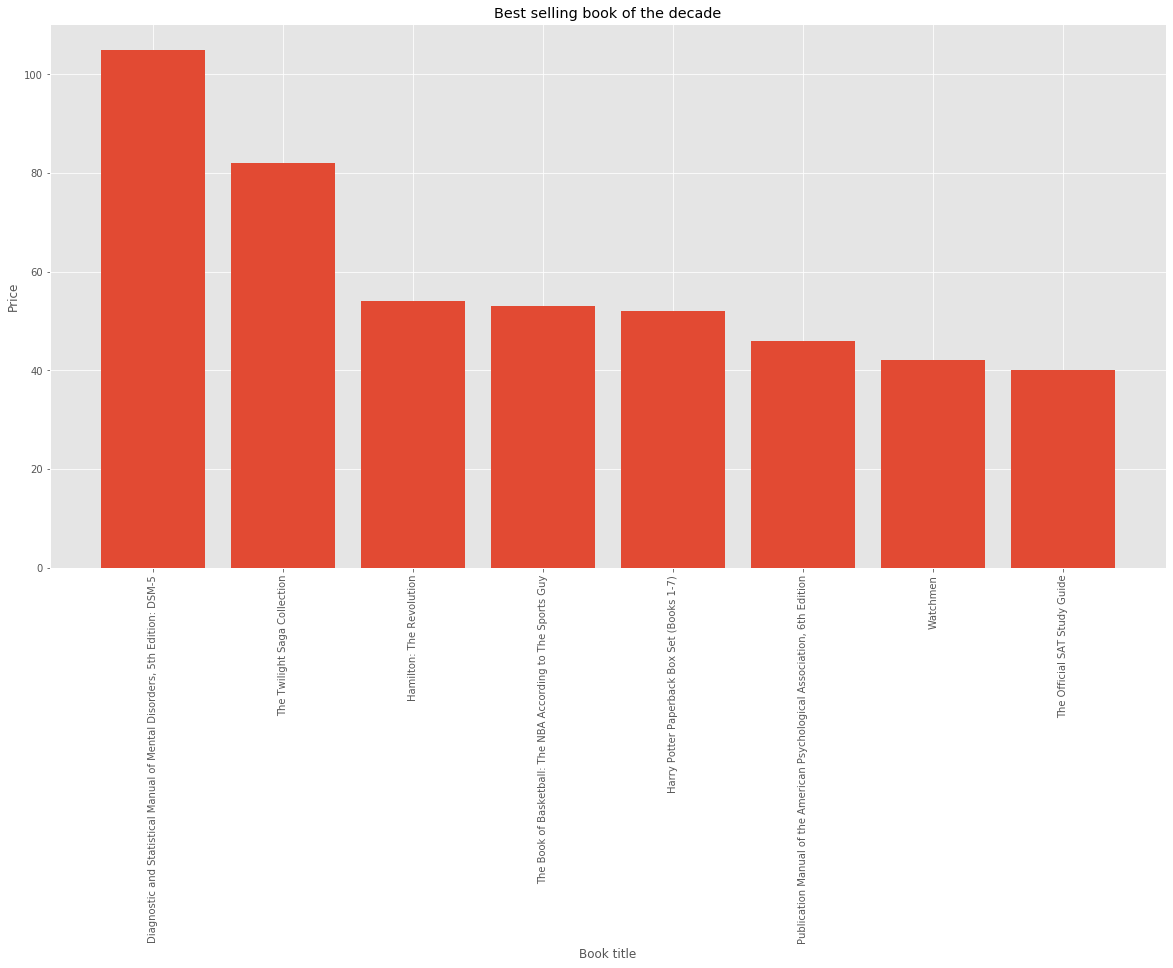

In [59]:
#Visualizing 20 best selling books of the decade.

best_seller = df.nlargest(20,'Price',  keep='all')
plt.bar(best_seller['Name'], best_seller['Price'])
plt.title('Best selling book of the decade')
plt.xticks(rotation = 90)
plt.xlabel('Book title')
plt.ylabel('Price')
plt.show()

percentage of non-fiction books = 56.36
percentage of fiction books = 43.64


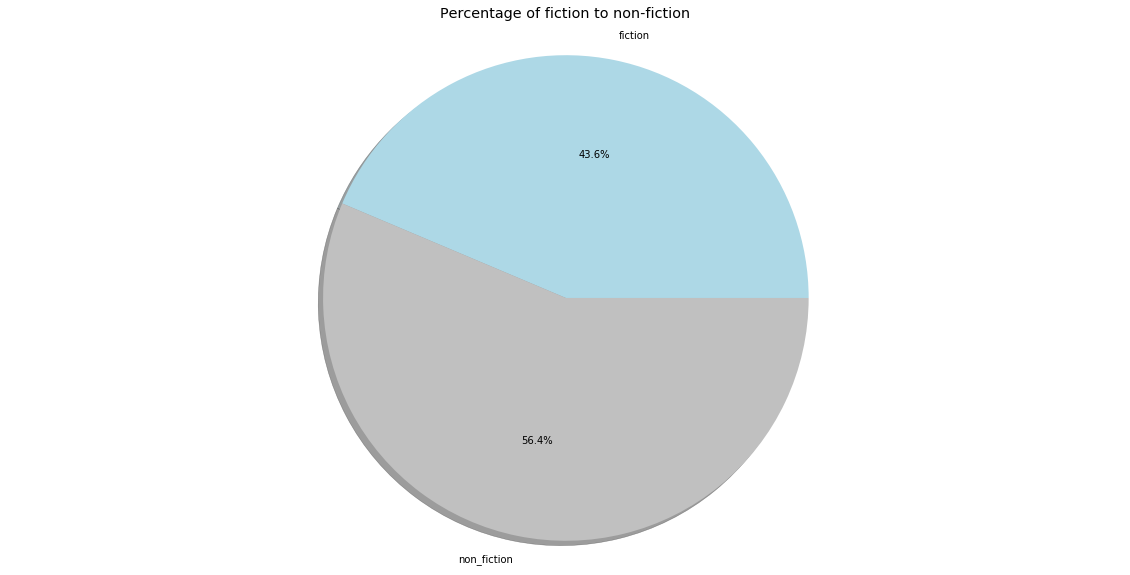

In [56]:
#Visualizing The percentage of fiction to non-fiction.

genre = df["Genre"]
my_colors = ['lightblue','silver']

non_fiction = np.sum(genre == "Non Fiction")
pct_non_fiction = round((non_fiction/550)*100, 2)
print(f"percentage of non-fiction books = {pct_non_fiction}")

fiction = np.sum(genre == "Fiction")
pct_fiction = round((fiction/550)*100, 2)
print(f"percentage of fiction books = {pct_fiction}")

plt.pie([fiction, non_fiction],labels= ["fiction", "non_fiction"], autopct='%1.1f%%',
        colors = my_colors, shadow = True)
plt.title('Percentage of fiction to non-fiction')
plt.axis('equal')

plt.show()


In [72]:
#VISUALIZING TRENDS OVER THE YEARS

price = df["Price"]
years = list(map(int, range(2010,2020)))
fig1 = df.loc[price, years].plot(kind = 'line', color = 'r')
plt.title('Review trends over the years',color = 'black')
plt.xlabel('Years',color = 'black')
plt.ylabel('No of reviews',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('linechart_single.png')

plt.show()

KeyError: "None of [Int64Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype='int64')] are in the [columns]"

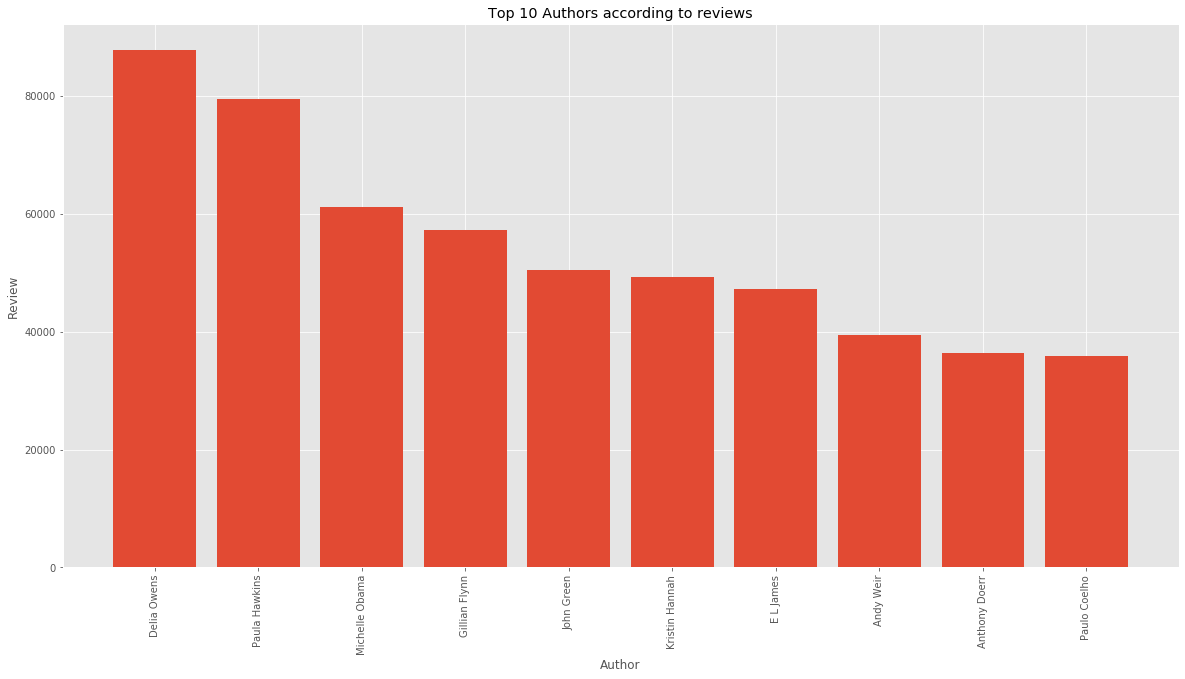

In [60]:
#Visualizing Top 10 Authors according to reviews.

#Authors_reviews = df.columns[2,4]
top_ten_authors = df.nlargest(20,'Reviews',  keep='all')
top_ten_authors

plt.bar(top_ten_authors['Author'], top_ten_authors['Reviews'])
plt.title('Top 10 Authors according to reviews')
plt.xticks(rotation = 90)
plt.xlabel('Author')
plt.ylabel('Review')
plt.show()

In [54]:
top_ten_authors

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
135,Gone Girl,Gillian Flynn,4.0,57271,10,2012,Fiction
136,Gone Girl,Gillian Flynn,4.0,57271,10,2013,Fiction
137,Gone Girl,Gillian Flynn,4.0,57271,9,2014,Fiction
365,The Fault in Our Stars,John Green,4.7,50482,13,2012,Fiction
366,The Fault in Our Stars,John Green,4.7,50482,13,2013,Fiction


In [69]:

years

['2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019']